In [249]:
import torch, torchmetrics, torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
#from sklearn.model_selection import train_test_split
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [250]:
#Getting a dataset from torchvision.datasets
"""fashionMNIST"""
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download = True,        #downloading the dataset
    transform=ToTensor(),           #how do we want to transform the data?
    target_transform=None           #how do we want tot transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download = True,
    transform=ToTensor(),           
    target_transform=None
)

In [251]:
len(train_data), len(test_data)

(60000, 10000)

In [252]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [253]:
"""the label is 9"""

'the label is 9'

In [254]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [255]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [256]:
image.shape

torch.Size([1, 28, 28])

Image Shape: torch.Size([1, 28, 28])


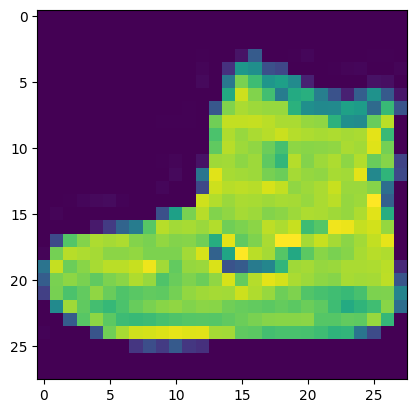

In [257]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())

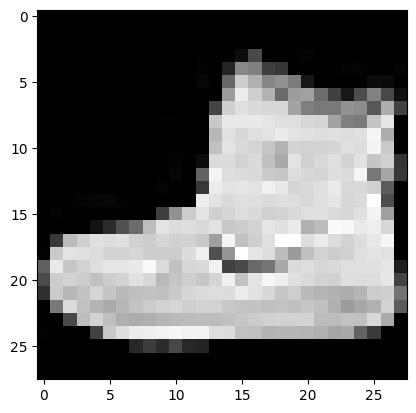

In [258]:
plt.imshow(image.squeeze(),cmap="gray")

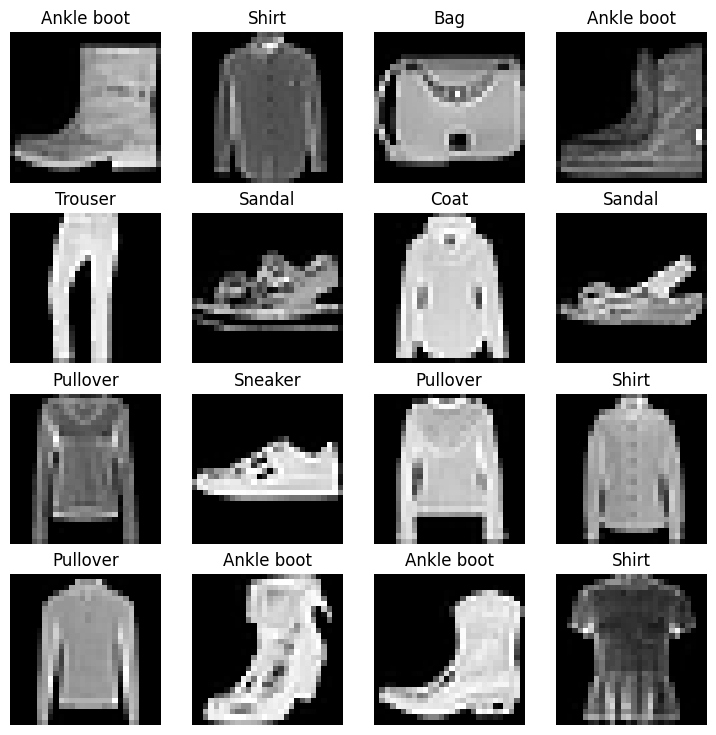

In [259]:
#plto more imgaes
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows = 4
columns =4
for i in range(1,rows*columns+1):
    random_idx = torch.randint(0,len(train_data),size =[1]).item()
    #print(random_idx)
    image, label = train_data[random_idx]
    fig.add_subplot(rows,columns,i)
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.gca().axis('off')

In [260]:
#prepare dataloader
import torch.utils
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,         #60000
                            batch_size = BATCH_SIZE,
                            shuffle = True)

test_dataloader = DataLoader(dataset=test_data,         #10000
                            batch_size=BATCH_SIZE,
                            shuffle=False)

In [261]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x342313650>,
 <torch.utils.data.dataloader.DataLoader at 0x3424c72d0>)

In [262]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [263]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

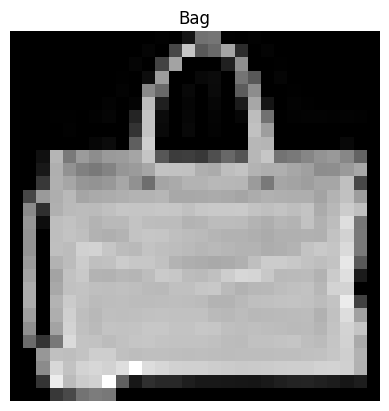

In [264]:
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap ='gray')
plt.title(class_names[label])
plt.axis('off')

ModelV0: baseline model

In [265]:
"""better to start witha  baseline model (a simple model you will try and improve on with subsequent models/ experiments)"""

'better to start witha  baseline model (a simple model you will try and improve on with subsequent models/ experiments)'

In [266]:
#create a flatten layer

flatten_model = nn.Flatten()

#get a single sample
x = train_features_batch[0]

#flatten the sample
output = flatten_model(x)

#print out what happened
print(f"shape before falttening: {x.shape}")
print(f"Shape after flattening: {output.shape}")


shape before falttening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [267]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units:int,
                output_shape: int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)

        )
    def forward(self,x):
        return self.layer_stack(x)

In [268]:
torch.manual_seed(42)

#setup model with inoput parameters
model_0 = FashionMNISTModelV0(input_shape=784,          #28*28
                              hidden_units=10,      #how many units in the hidden layer
                              output_shape=len(class_names)).to("cpu")        #one for every class
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [269]:
dummy_x = torch.rand([1,1,28,28])       #good to trouble shoot if the model output shapes are correct
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [270]:
"""10 values, 1 for each class, the prob if it being that class"""

'10 values, 1 for each class, the prob if it being that class'

In [271]:
#loss fn, optimizer and evaluation metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [272]:
#create a fn to time our experiment
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
    """prints difference between start and end time"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

Training loop

In [273]:
from tqdm.auto import tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

#create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}")
    train_loss = 0
    for batch, (x,y) in enumerate(train_dataloader):        #loop through the training batches
        model_0.train()

        y_pred = model_0(x)

        loss = loss_fn(y_pred,y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        if batch%400==0:
            print(f"Looked at {batch*len(x)}/{len(train_dataloader.dataset)} samples")

    #divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for x_test, y_test in test_dataloader:
            test_pred = model_0(x_test)     #this is a logit still
            test_loss += loss_fn(test_pred,y_test)
            test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device)
                                            )                

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:02<00:04,  2.01s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.04%
Epoch:1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:03<00:01,  1.98s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.20%
Epoch:2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:05<00:00,  1.95s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.43%
Train time on cpu: 5.850 seconds


make predictions and get Model 0 results

In [274]:
#setup device agnostic code
device = "mps" 
if torch.backends.mps.is_available():
    print("mps is available. GPU can be used with PyTorch on Apple Silicon.")
    
    # Optionally, you can get the MPS device name
    mps_device = torch.device("mps")
    print(f"Using device: {mps_device}")
else:
    print("mps is not available. GPU cannot be used with PyTorch on Apple Silicon.")


mps is available. GPU can be used with PyTorch on Apple Silicon.
Using device: mps


In [275]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
                data_loader: torch.utils.data.dataloader,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device=device):
    """Returns a dictionary containing the results of model predicting on data_loader"""

    loss, acc =0,0
    model.eval()
    with torch.inference_mode():
        for x , y in tqdm(data_loader):
            x,y= x.to(device),  y.to(device)
            y_pred = model(x)

            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred= y_pred.argmax(dim=1))
            
        #scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model name": model.__class__.__name__,
            "model loss":loss.item(),
            "model acc":acc}

#claculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device='cpu')

model_0_results


100%|██████████| 313/313 [00:00<00:00, 1573.07it/s]


{'model name': 'FashionMNISTModelV0',
 'model loss': 0.47663894295692444,
 'model acc': 83.42651757188499}

Non-Linear model on GPU

In [276]:
"""basically experimenting and changing certain parameters or loss fn or device"""

'basically experimenting and changing certain parameters or loss fn or device'

Model_1

In [277]:
class FashionMNISTModelV1 (nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU(),

        )

    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)
    

In [278]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)

In [279]:
#loss fn, optimizer and evaluation metrics (same as model_0)
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [280]:
#training loop fn

import torch.utils.data


def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device 
               ):
    train_loss ,train_acc = 0, 0
    model.train()

    for batch,(x,y) in enumerate(data_loader):
        x, y = x.to(device), y.to(device)           #important!!!!
        # model_0.train()
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch %400 == 0:
            print(f"Looked at: {batch*len(x)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

In [281]:
#testing loop fn
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device 
               ):
    test_loss,test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for x , y in data_loader:
            x, y = x.to(device), y.to(device)

            test_pred = model(x)
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred = test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [282]:
torch.manual_seed(42)
from timeit import default_timer as Timer
train_time_start_on_gpu = timer()

epochs = 3

#create an optimization and evalutaion loop using train_step() and test step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch:{epoch}")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer_1,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                                end=train_time_end_on_gpu,
                                                device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 1.09199 | Train Acc: 61.34%


 33%|███▎      | 1/3 [00:05<00:10,  5.26s/it]

Test Loss: 0.95637 | Test acc: 65.00%
Epoch:1
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.78097 | Train Acc: 71.94%


 67%|██████▋   | 2/3 [00:10<00:05,  5.20s/it]

Test Loss: 0.72611 | Test acc: 73.99%
Epoch:2
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.67040 | Train Acc: 75.94%


100%|██████████| 3/3 [00:15<00:00,  5.20s/it]

Test Loss: 0.69007 | Test acc: 74.81%
Train time on mps: 15.612 seconds


In [283]:
total_train_time_model_0            #train time on cpu

5.849570834019687

In [284]:
total_train_time_model_1            #train time on gpu

15.612322875007521

In [285]:
#get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

100%|██████████| 313/313 [00:00<00:00, 642.52it/s]


{'model name': 'FashionMNISTModelV1',
 'model loss': 0.6900655031204224,
 'model acc': 74.810303514377}

Model_2: building a Convolutional Neural Network (CNN)


In [286]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),        #values that we can set ourselves are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,     #must match the previous out channels
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,       #theres a trick to calculating this.....
                      out_features=output_shape)
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        #print(f"output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        #print(f"output shape of classifier: {x.shape}")
        return x

In [287]:
image.shape

torch.Size([1, 28, 28])

In [288]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,        #only got 1 colour channel
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device)


In [289]:
rand_image_tensor = torch.rand(1,28,28)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [290]:
#figuring out the shapes of each layer
# model_2(rand_image_tensor.unsqueeze(0).to(device))


Stepping through nn.Conv2d()

In [291]:
torch.manual_seed(42)

#create a batch of images
images = torch.randn(32,3,64,64)
test_image = images[0]
images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [292]:
# test_image

In [293]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

#pass the data through the convolutional layer
conv_output = conv_layer(test_image)

stepping through nn.MaxPool2d()

In [294]:
test_image.shape

torch.Size([3, 64, 64])

In [295]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [296]:
#create sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
test_image_through_conv.shape

torch.Size([1, 10, 62, 62])

In [297]:
#pass data through maxpool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
test_image_through_conv_and_max_pool.shape

torch.Size([1, 10, 31, 31])

Setup a loss function and optimizer for model 2

In [298]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

Training the CNN and evaluating the results

In [299]:
torch.manual_seed(42)


#measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer_2,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    
    train_time_end_model_2 = timer()
    total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                                end=train_time_end_model_2,
                                                device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.59279 | Train Acc: 78.39%


 33%|███▎      | 1/3 [00:07<00:14,  7.07s/it]

Test Loss: 0.39970 | Test acc: 85.82%
Train time on mps: 7.079 seconds
Epoch: 1
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.35597 | Train Acc: 87.24%


 67%|██████▋   | 2/3 [00:14<00:07,  7.08s/it]

Test Loss: 0.35238 | Test acc: 87.52%
Train time on mps: 14.164 seconds
Epoch: 2
Looked at: 0/60000 samples
Looked at: 12800/60000 samples
Looked at: 25600/60000 samples
Looked at: 38400/60000 samples
Looked at: 51200/60000 samples
Train loss: 0.31825 | Train Acc: 88.44%


100%|██████████| 3/3 [00:21<00:00,  7.25s/it]

Test Loss: 0.31944 | Test acc: 88.53%
Train time on mps: 21.760 seconds


Comparing model_2 to model_1 and model_0

In [300]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

100%|██████████| 313/313 [00:00<00:00, 522.67it/s]


{'model name': 'FashionMNISTModelV2',
 'model loss': 0.3194369375705719,
 'model acc': 88.52835463258786}

In [301]:
model_0_results

{'model name': 'FashionMNISTModelV0',
 'model loss': 0.47663894295692444,
 'model acc': 83.42651757188499}

In [302]:
model_1_results

{'model name': 'FashionMNISTModelV1',
 'model loss': 0.6900655031204224,
 'model acc': 74.810303514377}

Comparing model results and training time 

In [303]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model name,model loss,model acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.690066,74.810304
2,FashionMNISTModelV2,0.319437,88.528355


In [304]:
#add training time to reults comparison
compare_results["training_time"]=[total_train_time_model_0,         #adds a new column
                                  total_train_time_model_1,
                                  total_train_time_model_2]
compare_results

,model name,model loss,model acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,5.849571
1,FashionMNISTModelV1,0.690066,74.810304,15.612323
2,FashionMNISTModelV2,0.319437,88.528355,21.760037


Text(0, 0.5, 'model')

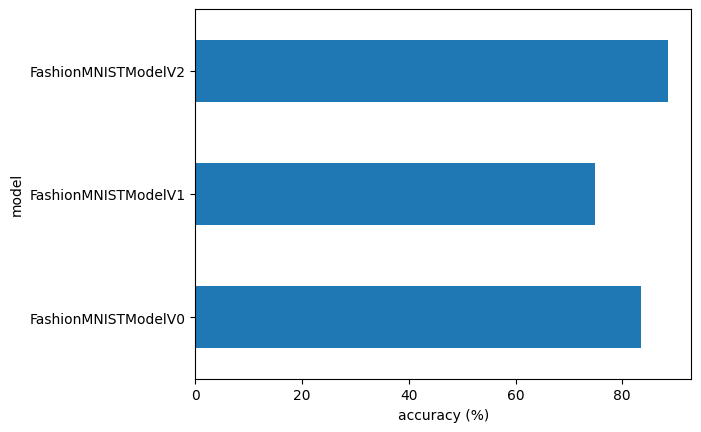

In [305]:
#visualize our model results
compare_results.set_index("model name")["model acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

Making predictions on random test samples with the best trained model

In [306]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device):
    pred_probs = []
    model.eval()
    model.to(device)
    with torch.inference_mode():
        for sample in data:
            #prepare the sample
            sample = torch.unsqueeze(sample,dim=0).to(device)

            #forward pass (model outputs raw logits)
            pred_logit = model(sample)

            #get prediction probability from the raw logits
            pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

            #get pred_prob off the gpu ontop the cpu
            pred_probs.append(pred_prob.cpu())


    #stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)



In [307]:
import random
random.seed(42)
test_samples = []
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):         #9 samples
    test_samples.append(sample)
    test_labels.append(label)

#view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

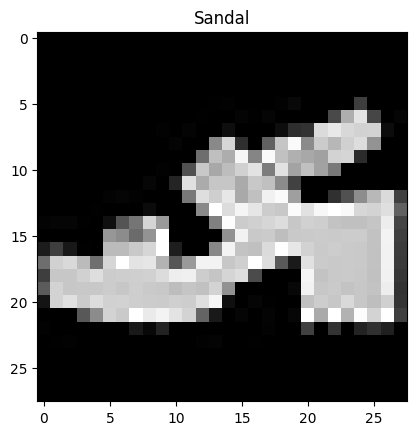

In [308]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [309]:
#make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)

#view the first 2 predictions
pred_probs[:2]

tensor([[2.0201e-07, 4.3590e-08, 1.6954e-07, 1.8225e-07, 1.9374e-08, 9.9974e-01,
         5.4939e-07, 6.0497e-06, 3.6462e-05, 2.1481e-04],
        [1.1139e-01, 4.2763e-01, 1.7169e-02, 2.9340e-01, 1.1547e-01, 2.3691e-04,
         3.2108e-02, 8.1356e-04, 1.0433e-04, 1.6845e-03]])

In [310]:
#how to convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

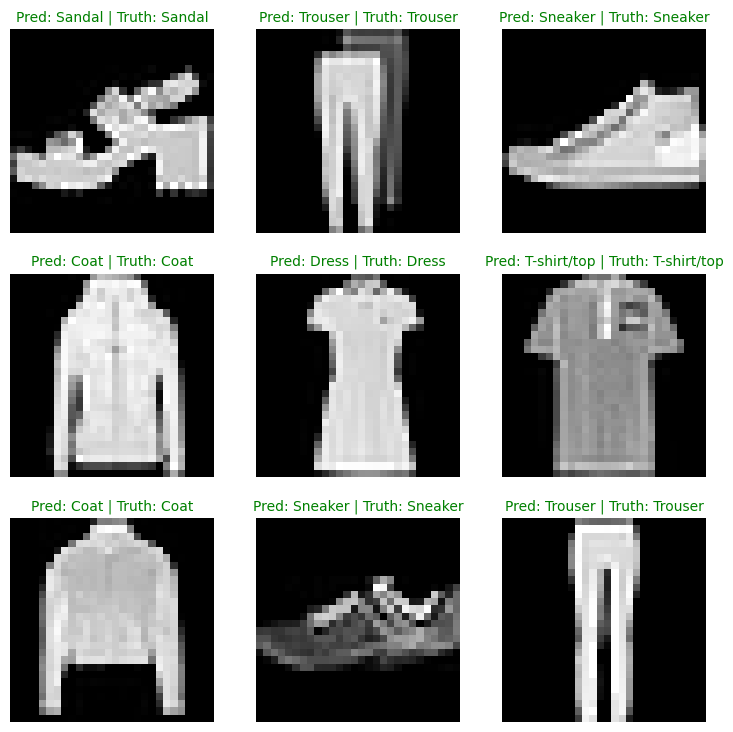

In [314]:
#plot the predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols= 3
for i , sample in enumerate(test_samples):
    #create subplot
    plt.subplot(nrows,ncols,i+1)

    #plot the target image
    plt.imshow(sample.squeeze(),cmap='gray')

    #find the prediction (in the form, e.g. 'Sandal')
    pred_label = class_names[pred_classes[i]]

    #get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    #create title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    #check the eqaulity b/w the pred and the truth and change the colour of the title text
    if pred_label == truth_label:
        plt.title(title_text,fontsize = 10, c='g')
    else:
        plt.title(title_text, fontsize = 10, c ='r')

    plt.axis(False)


In [315]:
#can repeat without the random seed to vary the predictions

Making a confusion matrix

In [316]:
#1. make predictions with our trained model on the test dataset
#2. make a confusion matrix 
#3. plot the confusion matrix using 'mlxtend.plotting.plto_confusion_matrix()'


In [323]:
import mlxtend
from tqdm.auto import tqdm

#1. make predcitions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for x,y in tqdm(test_dataloader, desc="making predictions..."):
        x,y = x.to(device), y.to(device)
        y_logit = model_2(x)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0 ).argmax(dim=1)
        y_preds.append(y_pred.cpu())

#concatenate list of predictions into a tensor
print(y_pred)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


making predictions...: 100%|██████████| 313/313 [00:00<00:00, 480.37it/s]

tensor([3, 2, 7, 5, 8, 4, 6, 2, 8, 9, 1, 9, 1, 8, 1, 8], device='mps:0')


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [324]:
len(y_pred_tensor)

10000

In [327]:
import torchmetrics
# mlxtend.__version__

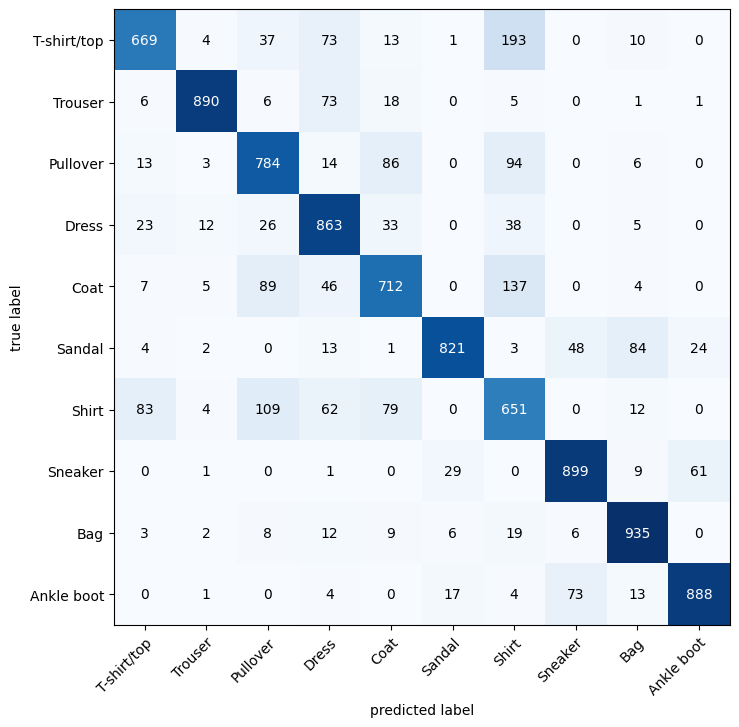

In [334]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. setup confusion matrix instance and compare predciitons to targets
confmat = ConfusionMatrix(task = 'multiclass',
                          num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

#3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,8)
)

In [335]:
# confmat_tensor

In [338]:
#the 193 on the top (slightly darker sq) means that it predicted it was a shirt 193 times even though it was a t-shirt/top
#this could be a potential concern, maybe the data is mislabeled 
#the coat and the pullover also

Save and load the model

In [344]:
from pathlib import Path
#create model dir path
model_path = Path("/Users/ryantang/jupyter notebook/PyTorch/models")

#create model save 
model_name = "03_PyTorch_ComputerVision_Model_2.pth"
model_save_path = model_path / model_name

#save the model state_dict
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_2.state_dict(), f=model_save_path)     #saving the model's state dict saves the model's learnt parameters, weights


Saving model to: /Users/ryantang/jupyter notebook/PyTorch/models/03_PyTorch_ComputerVision_Model_2.pth


In [345]:
#create a new instance of model_2
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=10)

#load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=model_save_path))

#send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [346]:
model_2_results

{'model name': 'FashionMNISTModelV2',
 'model loss': 0.3194369375705719,
 'model acc': 88.52835463258786}

In [348]:
#evaluate the loaded model
loaded_model_2_results = eval_model(model=loaded_model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
loaded_model_2_results

100%|██████████| 313/313 [00:00<00:00, 485.24it/s]


{'model name': 'FashionMNISTModelV2',
 'model loss': 0.3194369375705719,
 'model acc': 88.52835463258786}

In [349]:
# model results are exactly the same 

In [351]:
#check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model loss']),
              torch.tensor(loaded_model_2_results['model loss']),
              atol=1e-02)       #tolerance

tensor(True)